## <font color='blue'> 1 Reading and Exploring Data <font/>

### <font color = 'hotpink'> a. Import Libraries <font/>

In [1]:
# Import Libraries for Dataframe and Visualization
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### <font color = 'hotpink'> b. Read and Explore Data <font/>

In [2]:
# Read Data
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## <font color='blue'> 2 Data Cleansing <font/>
    
    a. Check and Drop Missing Values
    b. Check and Drop Duplicates
    c. Check and Change Data Types
    d. Exclude Noisy Data

### <font color='hotpink'> a. Check and Drop Missing Values <font/>

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df_null = round((df.isnull().sum()) / len(df) * 100, 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
df = df.dropna(subset = 'CustomerID')
df.shape

(406829, 8)

### <font color='hotpink'> b. Check and Drop Duplicates <font/>

In [10]:
df.duplicated().sum()

5225

In [11]:
df = df.drop_duplicates()
df.shape

(401604, 8)

### <font color='hotpink'> c. Check and Change Data Types <font/>

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

### <font color='hotpink'> d. Exclude Noisy Data <font/>
        Remove negative and 0 values in 'Quantity' and 'UnitPrice'.

In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


In [15]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.492832,NaN,22.241836


In [16]:
df.shape

(392692, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## <font color='blue'> 3 Calculating RFM Metrics <font/>
    
        a. RFM represents Recency, Frequency and Monetary.
           RFM is a model used to segment customers base by their purchasing patterns.
           
           Recency (R) : How long ago since the last purchase of each customer.
           Frequency (F) : How often each customer make purchases.
           Monetary (M) : Total amount of money each customer spends.
    
        b. RFM Score
           Rank each customer in these three categories on a scale of 1 to 4 (higher number, better result).

### <font color='hotpink'> a. RFM (Recency, Freqency, Monetary) <font/>

In [18]:
# Find the day after last purchase date
cal_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
cal_date

Timestamp('2011-12-10 12:50:00')

In [19]:
# Create a column of Total Amount
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (cal_date - x.max()).days,
                                    'InvoiceNo':'count',
                                    'Total':'sum'})

rfm.rename(columns = {'InvoiceDate':'Recency',
                      'InvoiceNo':'Frequency',
                      'Total':'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


In [21]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

rfm = rfm.assign(R = r_quartiles,
                 F = f_quartiles,
                 M = m_quartiles)

rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2


In [23]:
def rfm_seg(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM'] = rfm.apply(rfm_seg, axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,19,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


### <font color='hotpink'> b. RFM Score <font/>

In [24]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,19,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4


## <font color='blue'> 4 Data Preprocessing <font/>
    
    a. Detect and Remove Outliers using the IQR Method
    b. RFM Segmentation by RFM Score
    c. Standardization
    d. Find the Optimal Mumber of Clusters Using Elbow Method

### <font color='hotpink'> a. Detect and Remove Outliers using the IQR Method <font/>

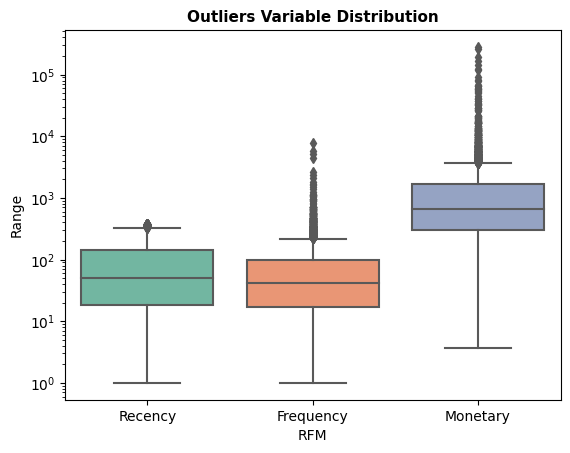

In [25]:
x = ['Recency','Frequency','Monetary']

sns.boxplot(data = rfm[x], palette="Set2")
plt.yscale('log')
plt.title("Outliers Variable Distribution", fontsize = 11, fontweight = 'bold')
plt.ylabel("Range")
plt.xlabel("RFM")
plt.show()

In [26]:
def remove_out(dataframe, column, q1=0.05, q3=0.95):
    Q1 = dataframe[column].quantile(0.05)
    Q3 = dataframe[column].quantile(0.95)
    IQR = Q3 - Q1
    dataframe = dataframe[(dataframe[column] >= Q1 - 1.5 * IQR) & (dataframe[column] <= Q3 + 1.5 * IQR)]
    return dataframe

In [27]:
rfm = remove_out(rfm, 'Recency', q1=0.05, q3=0.95)
rfm = remove_out(rfm, 'Frequency', q1=0.05, q3=0.95)
rfm = remove_out(rfm, 'Monetary', q1=0.05, q3=0.95)
rfm.shape

(4255, 8)

In [28]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,19,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4
12352,36,85,2506.04,3,3,4,334,10


In [29]:
rfm.reset_index(inplace=True)
rfm.tail()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
4250,18280,278,10,180.60,1,1,1,111,3
4251,18281,181,7,80.82,1,1,1,111,3
4252,18282,8,12,178.05,4,1,1,411,6
4253,18283,4,721,2045.53,4,4,4,444,12
4254,18287,43,70,1837.28,3,3,4,334,10


### <font color='hotpink'> b. RFM Segmentation by RFM Score <font/>

In [30]:
def segments(df):
    if df['RFM_Score'] > 10:
        return 'champions'
    
    elif (df['RFM_Score'] > 8) and (df['RFM_Score'] <= 10):
        return 'potential_loyalists'
    
    elif df['RFM_Score'] == 8:
        return 'need_attention'
    
    elif df['RFM_Score'] == 7:
        return 'about_to_sleep'
    
    elif (df['RFM_Score'] > 4) and (df['RFM_Score'] < 7):
        return 'at_risk'
    
    else:
        return 'hibernating'

rfm['Segment'] = rfm.apply(segments, axis=1)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Segment
0,12347,2,182,4310.00,4,4,4,444,12,champions
1,12348,75,31,1797.24,2,2,4,224,8,need_attention
2,12349,19,73,1757.55,3,3,4,334,10,potential_loyalists
3,12350,310,17,334.40,1,1,2,112,4,hibernating
4,12352,36,85,2506.04,3,3,4,334,10,potential_loyalists


In [31]:
import squarify
segments = rfm['Segment'].value_counts(normalize=True).sort_values(ascending=False)
segments

Segment
at_risk                0.228437
potential_loyalists    0.196710
hibernating            0.180729
champions              0.178613
about_to_sleep         0.108813
need_attention         0.106698
Name: proportion, dtype: float64

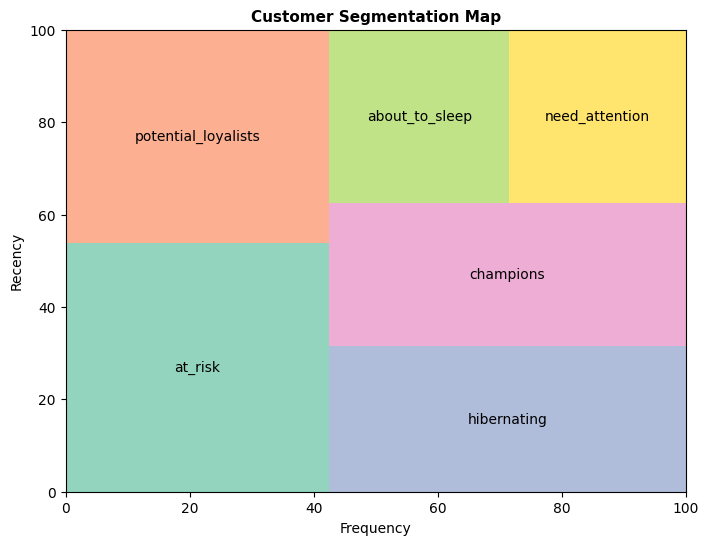

In [32]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8, 6)

squarify.plot(sizes=segments,
              label=['at_risk', 'potential_loyalists', 'hibernating', 'champions', 'about_to_sleep', 'need_attention'],
              color=sns.color_palette('Set2'),
              bar_kwargs={"alpha": 0.7})
plt.title("Customer Segmentation Map", fontsize=11, fontweight='bold')
plt.xlabel("Frequency")
plt.ylabel("Recency")
plt.show()

### <font color='hotpink'> c. Standardization <font/>

In [33]:
rfm_RFM = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_standard = scaler.fit_transform(rfm_RFM)
rfm_standard = pd.DataFrame(rfm_standard)
rfm_standard.columns = ['Recency', 'Frequency', 'Monetary']
rfm_standard.head()

,Recency,Frequency,Monetary
0,-0.918198,1.084410,1.692088
1,-0.189650,-0.455535,0.276119
2,-0.748536,-0.027206,0.253753
3,2.155675,-0.598311,-0.548208
4,-0.578874,0.095174,0.675536


### <font color='hotpink'> d. Find the Optimal Mumber of Clusters Using Elbow Method <font/>

In [34]:
wcss = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=46)
    kmeans.fit(rfm_standard)
    wcss.append(kmeans.inertia_)

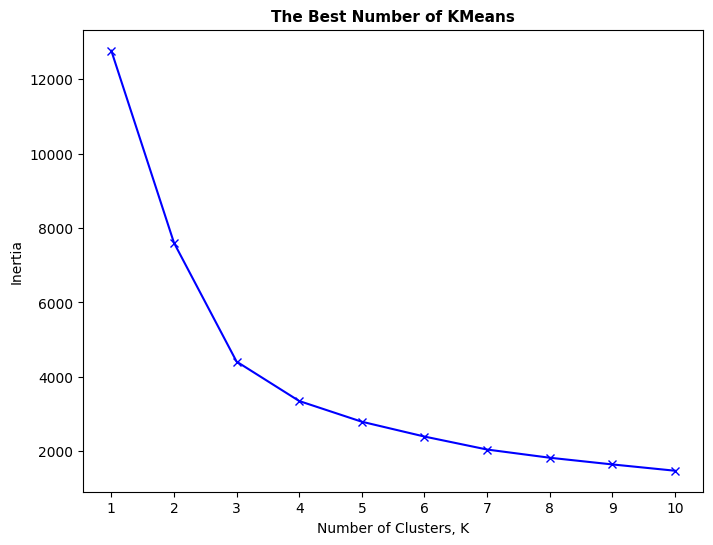

In [35]:
f, ax = plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(range_k, wcss, marker='x', color='blue')
plt.title('The Best Number of KMeans', fontsize = 11, fontweight = 'bold')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.show()

## <font color='blue'> 5 K-Means Clustering <font/>

In [36]:
# Choose K=3
kmeans = KMeans(n_clusters=3, random_state=46)
kmeans.fit(rfm_standard)

cluster_labels = kmeans.labels_
cluster_labels

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
rfm_k3= rfm.assign(K_Cluster = cluster_labels)
rfm_k3.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Segment,K_Cluster
0,12347,2,182,4310.00,4,4,4,444,12,champions,1
1,12348,75,31,1797.24,2,2,4,224,8,need_attention,0
2,12349,19,73,1757.55,3,3,4,334,10,potential_loyalists,0
3,12350,310,17,334.40,1,1,2,112,4,hibernating,2
4,12352,36,85,2506.04,3,3,4,334,10,potential_loyalists,0


In [38]:
rfm_k3.groupby('K_Cluster').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean',
                                 'RFM_Score':'mean'}).round(1)

,Recency,Frequency,Monetary,RFM_Score
K_Cluster,,,,
0,46.6,57.9,973.8,7.9
1,24.1,279.1,4981.0,11.3
2,249.1,25.3,429.3,4.4


In [39]:
rfm_k3.groupby(['K_Cluster', 'Segment']).agg({'CustomerID':'count',
                                              'Recency':'mean',
                                              'Frequency':'mean',
                                              'Monetary':'mean',
                                              'RFM_Score':'mean'}).round(1)

CustomerID  Recency  Frequency  Monetary   
K_Cluster Segment                                                         
0         about_to_sleep              392     53.9       34.0     680.2  \
          at_risk                     620     60.3       19.2     341.1   
          champions                   339     14.5      127.2    2104.0   
          hibernating                 170     82.8        8.7     169.6   
          need_attention              426     54.2       53.2     866.1   
          potential_loyalists         759     33.5       84.5    1378.1   
1         about_to_sleep                1    158.0       20.0    7374.9   
          champions                   421     14.2      295.3    5002.2   
          need_attention                6    119.0       46.2    7153.4   
          potential_loyalists          69     74.4      203.7    4628.1   
2         about_to_sleep               70    222.3       60.4    1100.1   
          at_risk                     352    241.3       33.5     545.2   
          hibernating                 599    257.1       11.6     207.4   
          need_attention               22    240.8      112.9    1653.2   
          potential_loyalists           9    246.1      132.4    2457.4   

                               RFM_Score  
K_Cluster Segment                         
0         about_to_sleep             7.0  
          at_risk                    5.6  
          champions                 11.3  
          hibernating                4.0  
          need_attention             8.0  
          potential_loyalists        9.5  
1         about_to_sleep             7.0  
          champions                 11.7  
          need_attention             8.0  
          potential_loyalists        9.8  
2         about_to_sleep             7.0  
          at_risk                    5.2  
          hibernating                3.4  
          need_attention             8.0  
          potential_loyalists        9.0

In [40]:
rfm_standard['CustomerID'] = rfm['CustomerID']
rfm_standard = rfm_standard.assign(K_Cluster = cluster_labels)
rfm_standard.head()

,Recency,Frequency,Monetary,CustomerID,K_Cluster
0,-0.918198,1.084410,1.692088,12347,1
1,-0.189650,-0.455535,0.276119,12348,0
2,-0.748536,-0.027206,0.253753,12349,0
3,2.155675,-0.598311,-0.548208,12350,2
4,-0.578874,0.095174,0.675536,12352,0


In [41]:
rfm_melt = pd.melt(rfm_standard,
                   id_vars = ['CustomerID', 'K_Cluster'],
                   value_vars = ['Recency', 'Frequency', 'Monetary'],
                   var_name = 'Metric',
                   value_name = 'Value')
rfm_melt.head()

,CustomerID,K_Cluster,Metric,Value
0,12347,1,Recency,-0.918198
1,12348,0,Recency,-0.189650
2,12349,0,Recency,-0.748536
3,12350,2,Recency,2.155675
4,12352,0,Recency,-0.578874


In [42]:
rfm_melt.shape

(12765, 4)

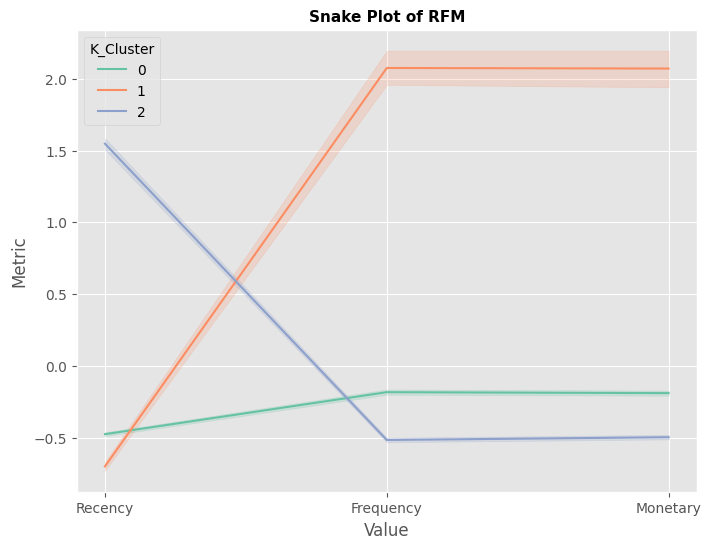

In [43]:
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=rfm_melt, x='Metric', y='Value', hue='K_Cluster', palette="Set2")
plt.style.use('ggplot')
plt.title('Snake Plot of RFM', fontsize=11, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.show()

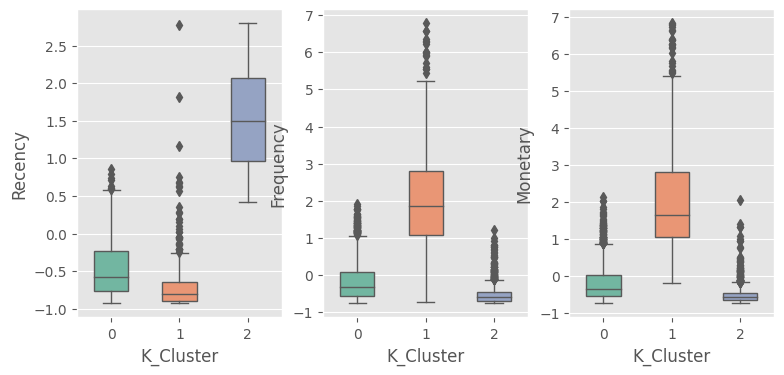

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
sns.boxplot(data=rfm_standard, x='K_Cluster', y='Recency', palette="Set2", width=0.5, linewidth=1, ax=axes[0])
sns.boxplot(data=rfm_standard, x='K_Cluster', y='Frequency', palette="Set2", width=0.5, linewidth=1, ax=axes[1])
sns.boxplot(data=rfm_standard, x='K_Cluster', y='Monetary', palette="Set2", width=0.5, linewidth=1, ax=axes[2])
plt.show()

In [45]:
from mpl_toolkits.mplot3d import Axes3D

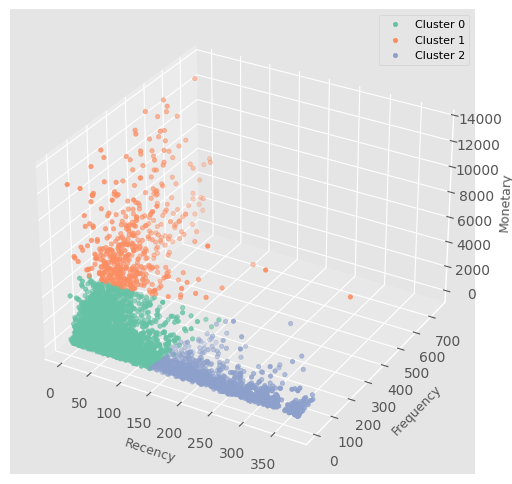

In [46]:
colors=['#66c2a5', '#fc8d62', '#8da0cb']
fig = plt.figure()
fig.set_size_inches(6, 8)
ax = plt.axes(projection='3d') #fig.add_subplot(111, projection='3d')

for i in range(kmeans.n_clusters):
    rfm_standard=rfm_k3[rfm_k3['K_Cluster']==i]
    ax.scatter(rfm_standard['Recency'], 
               rfm_standard['Frequency'],
               rfm_standard['Monetary'],
               s=10,
               label='Cluster '+str(i),
               c=colors[i])
    
ax.set_xlabel('Recency', fontsize=9)
ax.set_ylabel('Frequency', fontsize=9)
ax.set_zlabel('Monetary', fontsize=9)

plt.legend(fontsize=8)
plt.show()